# Data Science: Bridging Principle and Practice
## Part 5: Categorizing Data

<img src="images/ab_test.PNG" style="width: 900px; height: 250px;" />


### Table of Contents


*In this notebook, we will learn how to manipulate and visualize categorical data. We will then apply these tools to explore how consumer response different at different times or days in the Rocket Fuel case.*

<ol start=5>
    <li><a href="section5">DataFrames II: Categorizing Data</a></li>
    <ol>
        <li><a href="subsection5a">Groupby</a></li>
        <li><a href="subsection5b">Visualization: Bar Plots</a></li>
        <li><a href="subsection5c">Consumer Response vs Day of the Week</a></li>
        <li><a href="subsection5d">Consumer Response vs Hour of the Day</a></li>
    </ol>
    </ol>

In [19]:
# dependencies: THIS CELL MUST BE RUN
import pandas as pd
import seaborn as sns
%matplotlib inline
import calendar

# make the plots bigger
sns.set(rc={'figure.figsize':(11.7,8.27)})

In the previous notebook, we learned some basic Python and Table operations and applied them to the Rocket Fuel data to answer questions about the profitability of the ad campaign. 

Here, we'll build on those previous skills to dive deeper into the Rocket Fuel case. We'll explore questions including:

- How did conversions relate to different *hours of the day* and *days of the week*?

To answer these questions, we'll need to know a few additional Python operations
.

# 5. DataFrames II: Categorizing Data <a id='section5'></a>

As a reminder, our data looks like this:

In [28]:
# load the rocket fuel data
ads = pd.read_csv('data/rocketfuel_data_renamed.csv', index_col=0)

# change days to a categorical variable so it will sort correctly
cat_type = pd.CategoricalDtype(categories=list(calendar.day_name), ordered=True)
ads["most ads day"] = ads["most ads day"].astype(cat_type)

# display the first ten rows
ads.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


This Table shows the conversion behavior of each user in the study. But, we're not interested in individual user behavior right now- we want to know the behavior of *all users in a specific category*, like everyone who saw the most ads on a Monday, or everyone who saw 200 ads in total.

In this section, we'll talk about:
1. The definition of **categorical data**
2. How to use DataFrame methods to **group data into categories**
3. Using **visualizations** to view and compare categories



Let's say we have data about some of the handbags TaskBella sells, including the color, price, and rating for each collected from different stores.

In [ ]:
# create the example handbag data Table
handbags = pd.DataFrame(data={"color":["black", "red", "red", "brown", "black"],
                               "price":[115.99, 130, 124.95, 144.99, 120.05],
                               "rating":[4, 4, 5, 3, 4]})
handbags

### Data Types: Numerical and Categorical
This table has two different types of data: **numerical** and **categorical**.

Price and rating are **numerical**: they have numbers for values, and we can order those values along a scale from least to most.

Color is **categorial**: it has strings (text) for values, and those values can't really be ordered from least to most.

The type of data affects the kind of analysis we can do, in addition to how we visualize it. For now, we're going to focus on categorical data.



## 5a. Groupby <a id='subsection5a'></a>

A question we might ask is how price or rating is different for different categories of color. To conduct this analysis, we want to do something like this:

1. Find all the possible colors
2. Sort all the rows of the DataFrame into groups, one for each unique color
3. Return a new DataFrame with one row for each color and information about that color of bag

To use `groupby`, call it on a DataFrame using dot notation and specify which column you want to group on as the argument.

In [ ]:
# group by handbag color
handbags.groupby("color")

The output above looks pretty strange. After we've told the computer to group the data by color, it doesn't know what to do with the groups. Should it count the items in the group? Should it take the average?

So, when we group items in a DataFrame, we also must say how we want to *aggregate* the groups by specifying an *aggregation function*. For this example, let's get the counts of each color of bag.

In [ ]:
# group by handbag color and return the count of each
handbags.groupby("color").count()

We now have a new DataFrame with the count of each number of handbag. Notice that the "price" and "rating" columns are the same because counts don't depend on price or rating.

<br/>
<div class="alert alert-warning">
    <b>EXERCISE:</b> Use `group` to group the handbags by `"rating"`.
    <div>

In [ ]:
# group by rating
handbags.groupby("...").count()

There are several aggregation methods besides `count`.

For example, if we want to know the average price and average rating of each color of handbag, we can use the `mean` method.

In [ ]:
# get average price and rating per color
bag_avgs = handbags.groupby("color").mean()
bag_avgs

A picture might help to understand what just happened.

<img src="images/group_ex.png" style="width: 1000px; height: 400px;" />

<br/>


<div class="alert alert-warning">
<p><b>EXERCISE:</b> We want to look at how conversion rates are different for different days of the week in the Rocket Fuel case. Fill in the ellipses below to group the `ads` data by the day on which a user saw the most ads, then add `mean` as the aggregation function.</p>

<p> Note: there's an extra argument in `groupby` called `as_index` which determines whether or not the groups will be the new DataFrame index. In this case, we don't want the groups as the index, so leave it set to `False`.</p>
</div>

In [24]:
# fill in the ... with the correct code
day_rates = ads.groupby("...", as_index=False)
day_rates

,user id,converted,total ads,most ads hour
most ads day,,,,
Monday,1.318831e+06,0.032812,25.328517,14.608179
Tuesday,1.321255e+06,0.029840,23.925464,14.038191
Wednesday,1.317974e+06,0.024942,24.539205,14.287438
Thursday,1.310194e+06,0.021571,23.428852,14.511026
Friday,1.310578e+06,0.022212,26.612129,14.694454
Saturday,1.296354e+06,0.021051,25.227663,14.699963
Sunday,1.300229e+06,0.024476,24.403661,14.384197


<div class="alert alert-info">
<b>Collection functions and data types:</b>
<p>The collect function you use must also work on the type of data in your rows for each group. For example, if you try to reduce using `mean` to get the average value and one or more columns has text data, those columns will be ignored since the computer doesn't know how to take the average of a word. You can see above that the text data in the "test group" column has been dropped.</p>

<p>However, Python treats Boolean values (`True` and `False`) like numbers: 1 for `True` and 0 for `False`. So, taking the average of the True/False values in the "converted" column is like adding up the number of `True` (people who converted) and dividing it by the total number of people in the DataFrame. This is the *conversion rate*.</p>

</div>

## 5b. Visualization: Bar Plots <a id="subsection5b"></a>

DataFrames provide great ways to organize and display data. But as data sets grow very large (i.e. thousands, tens of thousands, even millions of rows), it becomes harder and harder to understand what's going on with the data just by looking at it in a table.

*Visualizations* are helpful to:
- get a big-picture understanding of a data set
- compare two or more variables
- find the variance of a variable

and much more.

Let's look again at the DataFrame we just made containing the average feature values for each day.

In [27]:
day_rates 

,most ads day,user id,converted,total ads,most ads hour
0,Monday,1.318831e+06,0.032812,25.328517,14.608179
1,Tuesday,1.321255e+06,0.029840,23.925464,14.038191
2,Wednesday,1.317974e+06,0.024942,24.539205,14.287438
3,Thursday,1.310194e+06,0.021571,23.428852,14.511026
4,Friday,1.310578e+06,0.022212,26.612129,14.694454
5,Saturday,1.296354e+06,0.021051,25.227663,14.699963
6,Sunday,1.300229e+06,0.024476,24.403661,14.384197


One of the best ways to visualize categorical data is with a **bar plot**. Bar plots allow us to compare multiple categories within the same plot. 

To make our plots, we'll be using a software library called **Seaborn**. Seaborn is built to make polished visualizations in Python without a lot of code. The standard abbreviation for Seaborn in Python code is `sns`, after [a character in the TV show *The West Wing*](https://en.wikipedia.org/wiki/Sam_Seaborn).

We will make a bar plot by calling the `barplot` method from the Seaborn (`sns`) library. `barplot` takes 3 arguments:
1. `x`: the name of the column with the categories that will go on the x-axis
2. `y`: the name of the column with the numerical data that will determine the height of the bars on the y-axis
3. `data`: the name of the DataFrame

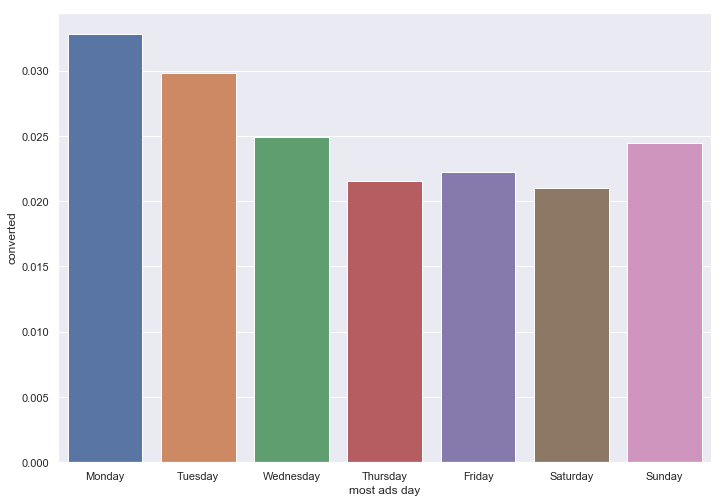

In [31]:
# plot a barplot of the conversion rates for each day
sns.barplot(x="most ads day", y="converted", data=day_rates);

Each category is listed on the vertical axis and represented by a bar. The length of each bar is the conversion rate.

It's also good to know that Seaborn will do grouping and averaging automatically. If we call `barplot` on our ungrouped `ads` table and ask it to plot "most ads day" on the x-axis and "converted" on the y-axis, it will group the rows by day and find the average of the "converted" column (i.e. the conversion rate) behind-the-scenes.

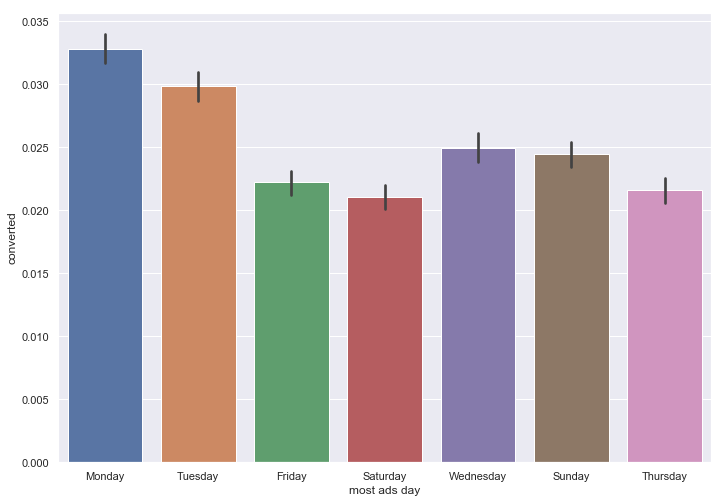

In [32]:
# make a barplot with the original ads data (ungrouped)
sns.barplot(x="most ads day", y="converted", data=ads);

Notice that we've generated almost the same plot; the only difference is that when the data is ungrouped, Seaborn adds error bars.

## 5c. Consumer Response vs. Day of Week<a id="subsection5c"></a>

Suppose we want to return to our original question: how does conversion rate differ between different days of the week *for the two different test groups*? 

Seaborn can handle this by adding an extra argument to `barplot`. The `hue` argument takes the name of a categorical column in the data, and it will make a different hue of bars for each category.

Here, we've chosen `test group` to set the hue so that bars representing the "ads" group will be blue and bars representing the "psa" group will be orange.

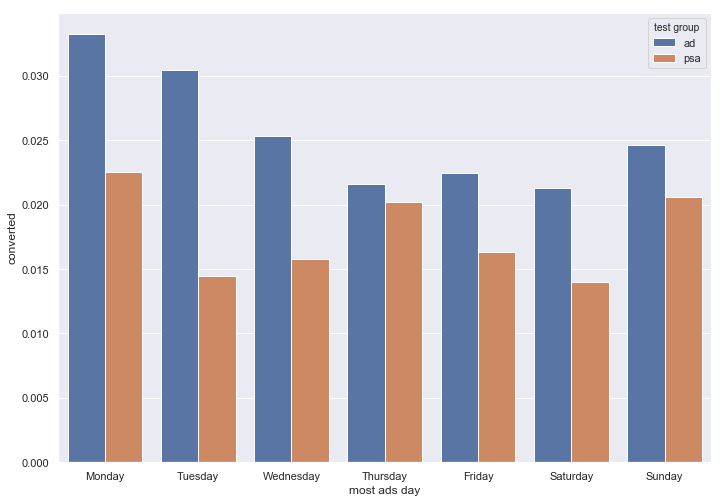

In [21]:
# make a bar plot with different colors for each test group
sns.barplot(x="most ads day", y="converted", hue="test group", data=ads);

<div class="alert alert-warning">
    <b>QUESTION:</b> On which days is advertising the most effective? When is it least effective? 
    </div>

**ANSWER**: *Fill in your answer here*

## 5d. Consumer Response vs Hour of Day <a id="subsection5d"></a>
Next, we want to see how the conversion rate does or does not changes for each test group by *time of day*.

<div class="alert alert-warning">
    <b>EXERCISE:</b> Create a bar plot showing the consumer response vs the hour of the day.
    <ul>
    <li>The height of the bars (<code>y</code>) should be the conversion rate</li>
    <li>The categories (<code>x</code>) should be the different hours of the day</li>
    <li>The hue should be the test groups</li>
    <li>The data should be from the <code>ads</code> DataFrame</li>
    </ul>
    <br>
    Look at the "Conversion Rate vs Day of Week and Test Group" example for some hints- you should be able to copy that code and change one value to solve this exercise.
    </div>

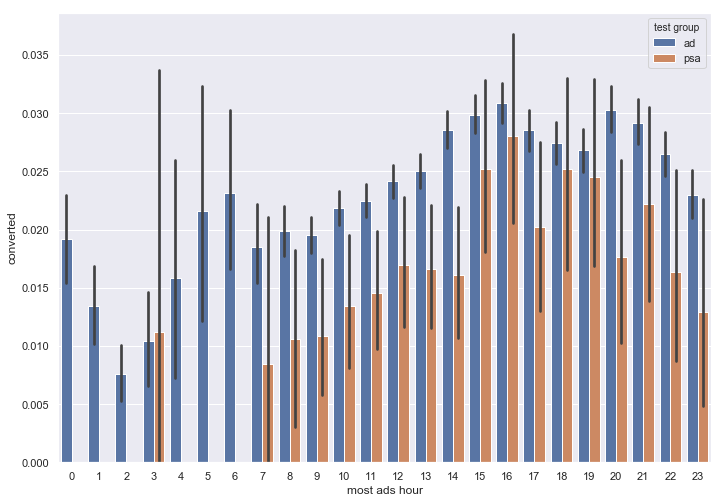

In [22]:
# make a bar plot
sns.barplot(x=..., y=..., hue=..., data=...);

<div class="alert alert-warning">
    <b>QUESTION:</b> At which hours is advertising the most effective? When is it least effective? 
    </div>

**ANSWER:** *Fill in your answer here*

#### References

- Rocket Fuel data and discussion questions adapted from materials by Zsolt Katona and Brian Bell, BerkeleyHaas Case Series

Author: Keeley Takimoto